In [1]:
# Imports
import torch
import numpy as np
import pandas as pd
from PIL import Image
import gymnasium as gym

from base_agent.dqn_agent import DQNAgent as BaseAgent
from per.dqn_agent import DQNAgent as PERAgent
from utils import make_epsilon_greedy_policy, plot_episode_stats

In [6]:
# from IPython.display import Image as IImage

# def save_rgb_animation(rgb_arrays, filename, duration=50):
#     """Save an animated GIF from a list of RGB arrays."""
#     # Create a list to hold each frame
#     frames = []

#     # Convert RGB arrays to PIL Image objects
#     for rgb_array in rgb_arrays:
#         rgb_array = (rgb_array*255).astype(np.uint8)
#         rgb_array = rgb_array.repeat(48, axis=0).repeat(48, axis=1)
#         img = Image.fromarray(rgb_array)
#         frames.append(img)

#     # Save the frames as an animated GIF
#     frames[0].save(filename, save_all=True, append_images=frames[1:], duration=duration, loop=0)

# def rendered_rollout(policy, env, max_steps=1_000):
#     """Rollout for one episode while saving all rendered images."""
#     obs, _ = env.reset()
#     imgs = [env.render()]

#     for _ in range(max_steps):
#         action = policy(torch.as_tensor(obs, dtype=torch.float32).unsqueeze(0))
#         obs, _, terminated, truncated, _ = env.step(action)
#         imgs.append(env.render())
        
#         if terminated or truncated:
#             break

#     return imgs

# policy = make_epsilon_greedy_policy(agent.q, num_actions=env.action_space.n)
# imgs = rendered_rollout(policy, env)
# save_rgb_animation(imgs, "trained.gif")
# IImage(filename="trained.gif")

In [1]:
import matplotlib.pyplot as plt

def plot_comparison_stats(based_stats, per_stats, smoothing_window=500, env_name=""):
    """
    Plots the smoothed episode rewards for two different sets of statistics.
    
    Parameters:
        based_stats: Stats object with 'episode_rewards' attribute (baseline stats).
        per_stats: Stats object with 'episode_rewards' attribute (performance stats).
        smoothing_window: The window size for smoothing the rewards.
    """
    fig, ax = plt.subplots(figsize=(10, 5), tight_layout=True)
    
    rewards_smoothed_based = based_stats["reward"].rolling(smoothing_window, min_periods=smoothing_window).mean()
    rewards_smoothed_per = per_stats["reward"].rolling(smoothing_window, min_periods=smoothing_window).mean()
    
    ax.plot(rewards_smoothed_based, label=f"Baseline Rewards", color="blue")
    ax.plot(rewards_smoothed_per, label=f"PER Rewards", color="red")
    
    ax.set_xlabel("Episode")
    ax.set_ylabel("Episode Reward (Smoothed)")
    ax.set_title(f"Comparison of Episode Rewards Breakout")
    ax.legend()
    
    plt.show()

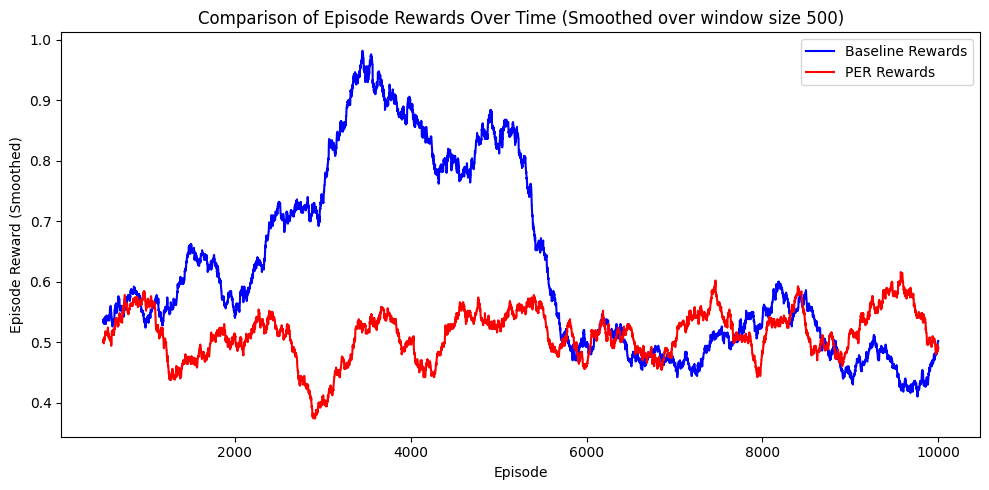

In [1]:
# Comparison plots 
import pandas as pd

from utils import plot_comparison_stats

base_stats = pd.read_csv("results/old_hyperparams/breakout_base.csv")
per_stats = pd.read_csv("results/old_hyperparams/breakout_per.csv")

plot_comparison_stats(base_stats, per_stats, smoothing_window=500)